# Salary Estimation Using the K_Nearest_Neighbor

# importing the Libraries 

In [1]:
import pandas as pd  
import numpy as np

In [7]:
df=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Documents\\CSV Files\\Salary.csv")

In [3]:
df.shape

(32561, 5)

In [34]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [13]:
df.isna().any()

age               False
education.num     False
capital.gain      False
hours.per.week    False
income            False
dtype: bool

In [36]:
df.isna().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

In [37]:
df.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [39]:
%whos

Variable           Type              Data/Info
----------------------------------------------
StandardScaler     type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                  DataFrame                age  education.num<...>n[32561 rows x 4 columns]
X_test             ndarray           8141x4: 32564 elems, type `float64`, 260512 bytes (254.40625 kb)
X_train            ndarray           24420x4: 97680 elems, type `float64`, 781440 bytes (763.125 kb)
Y                  Series            0        0\n1        0\n2<...>ngth: 32561, dtype: int32
df                 DataFrame                age  education.num<...>n[32561 rows x 5 columns]
df1                DataFrame                age  education.num<...>n[32561 rows x 5 columns]
error              list              n=0
income_set         set               {'<=50K', '>50K'}
np                 module            <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                 module            <module 'pan

# Mapping Salary Data to Binary Values

In [9]:
df1=df.replace({"<=50K":0,
               ">50K":1
              }
             )

In [10]:
df1.tail()

,age,education.num,capital.gain,hours.per.week,income
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0
32560,22,9,0,20,0


In [11]:
type(df.income[0])

str

### OR

In [12]:
income_set=set(df['income'])
df['income']=df['income'].map({'<=50K':0,'>50K':1}).astype(int)

In [13]:
df

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
...,...,...,...,...,...
32556,22,10,0,40,0
32557,27,12,0,38,0
32558,40,9,0,40,1
32559,58,9,0,40,0


# Segregate Dataset into X (input/Independent Variable) and Y(output/Dependent variable)

In [16]:
X=df.iloc[:,:-1]

In [15]:
Y=df.iloc[:,-1]

In [16]:
X[0:5]

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40


In [17]:
Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

# Visualize the Dataset

In [18]:
import seaborn as sns

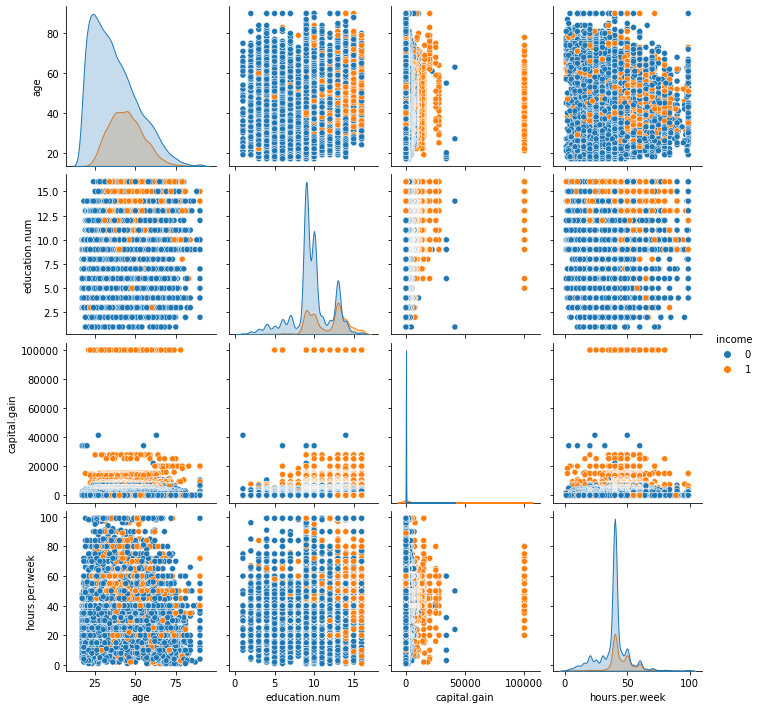

In [19]:
sns.pairplot(df,hue='income')

# Splitting the Datasets into Train Test Split

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

# Feature Scalling

In [48]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [43]:
sc=StandardScaler()

In [44]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Finding the best K value

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


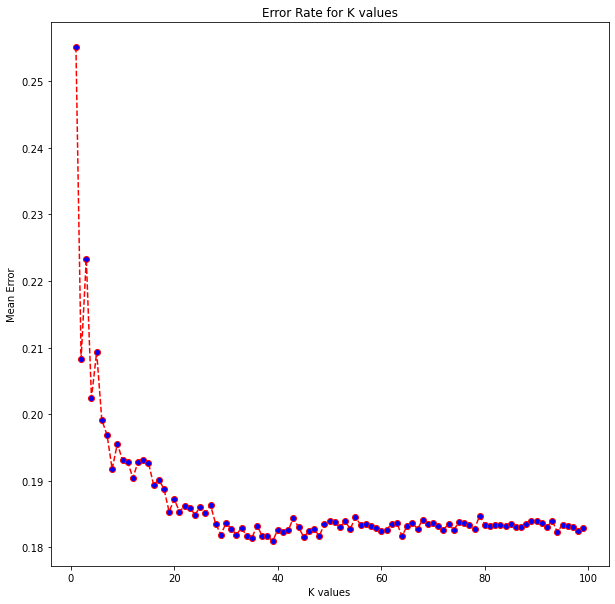

In [93]:
acc_score=[]
error_rate=[]
#Calculating the errors for k values between 1 to 40
for i in range(1,100):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc_score.append(accuracy_score(y_test,y_pred))
    error_rate.append(1-accuracy_score(y_test,y_pred))
plt.figure(figsize=(10,10))    
plt.plot(range(1,100),error_rate,"--or",markerfacecolor='blue')
plt.title("Error Rate for K values")
plt.xlabel("K values")
plt.ylabel("Mean Error")
plt.show()

In [110]:
df=pd.DataFrame([np.arange(1,100),acc_score,error_rate]).Ty

In [114]:
df=df.rename(columns={0:'K',1:'acc_score',2:'error_rate'})
df.head()

,K,acc_score,error_rate
0,1.0,0.744872,0.255128
1,2.0,0.791672,0.208328
2,3.0,0.776686,0.223314
3,4.0,0.797568,0.202432
4,5.0,0.790689,0.209311


# finding the k value which have maximum accuaracy

In [116]:
df[df['acc_score']==max(df['acc_score'])]

,K,acc_score,error_rate
38,39.0,0.819064,0.180936


# Trainning the Algorithm

In [130]:
from sklearn.neighbors import KNeighborsClassifier
power_model=KNeighborsClassifier(n_neighbors=39,metric='minkowski',p=2).fit(X_train,y_train)

# Prediction

## lets predict the new employee salary

In [131]:
def PredSalary(age,edu,cg,hw):
    newEmp=[[age,edu,cg,hw]]
    result=power_model.predict(sc.transform(newEmp))
    if result==1:
        print("Employee might get salary above 50k")
    else:
        print("Employee won't get salary above 50k")

In [132]:
PredSalary(68,9,0,40)

Employee won't get salary above 50k


# Evaluating the model

In [134]:
y_pred=power_model.predict(X_test)

In [135]:
confusion_matrix(y_test,y_pred)

array([[5793,  360],
       [1113,  875]], dtype=int64)

In [138]:
accuracy_score(y_test,y_pred)

0.8190639970519592